<a href="https://colab.research.google.com/github/Eason0227/Semiconductor-Manufacturing-Procees-Prediction/blob/main/Exploratory%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,KFold, StratifiedKFold, cross_val_score

from pandas import set_option
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
df = pd.read_csv('/content/drive/MyDrive/uci-secom.csv')
df

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [ ]:
df = df.drop(['Time'],axis=1)

## Check missing value

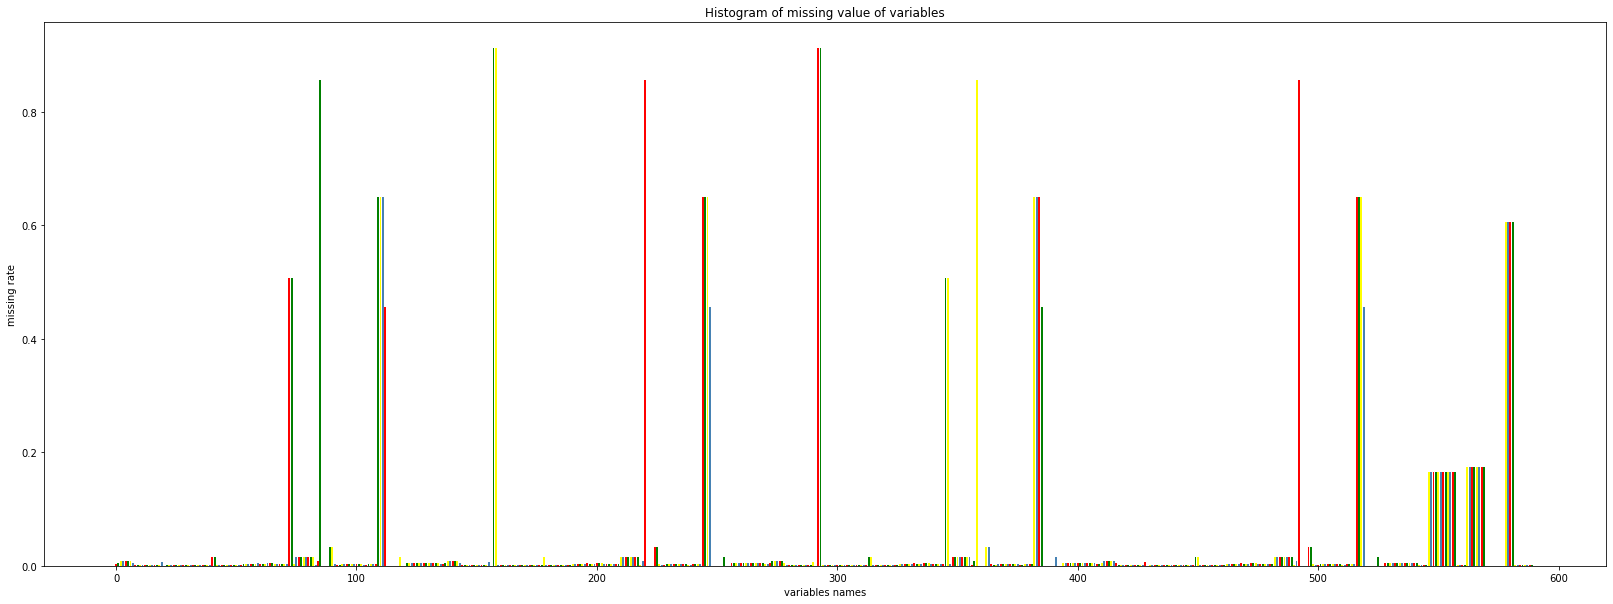

In [ ]:
missing= df.isnull().sum().reset_index().rename(columns={0:'missNum'})
missing['missRate']=missing['missNum']/df.shape[0]
fig = plt.figure(figsize=(28,10))
plt.bar(np.arange(missing.shape[0]), list(missing.missRate.values), align = 'center', color = ['red','green','yellow','steelblue'])
plt.title('Histogram of missing value of variables')
plt.xlabel('variables names')
plt.ylabel('missing rate')
plt.show()

## Remove the feature with more than 90% of null values

In [ ]:
empty = missing[missing['missRate']>0.9]['index'].values
df = df.drop(empty,axis=1)
print(df.shape)

(1567, 587)


## Imputation

In [ ]:
knn =  KNNImputer(n_neighbors=3)
impute = knn.fit_transform(df)
df_impute = pd.DataFrame(impute, columns = df.columns)

In [ ]:
labelencoder = LabelEncoder()
df_impute['Pass/Fail'] = labelencoder.fit_transform(df_impute['Pass/Fail'])
df_feature = df_impute.drop(['Pass/Fail'],axis = 1)
df_label = df_impute['Pass/Fail']

## Examining Class Imbalance

0    1463
1     104
Name: Pass/Fail, dtype: int64


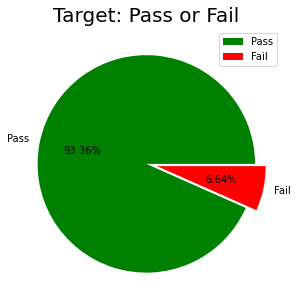

In [ ]:
# pie chart
labels = ['Pass', 'Fail']
size = df_label.value_counts()
colors = ['green', 'red']
explode = [0, 0.1]

print(df_label.value_counts())
plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (5 ,5)
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%", shadow = False)
plt.axis('off')
plt.title('Target: Pass or Fail', fontsize = 20)
plt.legend()
plt.show()

## Addressing Outliers
Outliers are identified and replaced by median value of the corresponding feature.

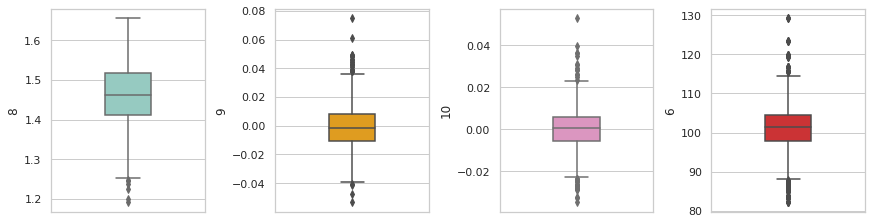

In [ ]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(1,4,constrained_layout=True, figsize=(12, 3))
sns.boxplot(y = df.iloc[:,8],palette="Set3", width=0.3,ax=ax[0])
sns.boxplot(y = df.iloc[:,9],color="orange", width=0.3,ax=ax[1])
sns.boxplot(y = df.iloc[:,10],palette="Set2_r", width=0.3,ax=ax[2])
sns.boxplot(y = df.iloc[:,6],palette="Set1", width=0.3,ax=ax[3])

## The Correlation between  Data Feature

Text(0.5, 1.0, 'Correlation heatmap for the 30 features')

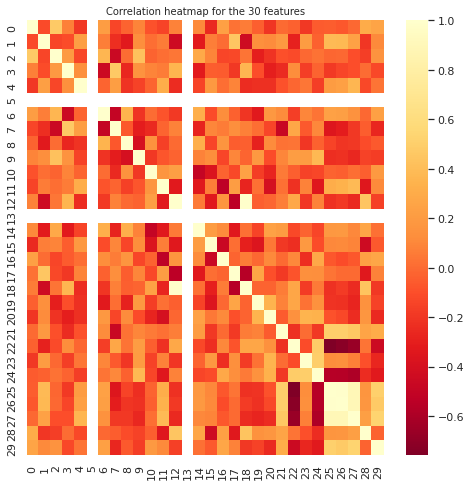

In [ ]:
# heatmap to get correlation

plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(df_feature.iloc[:30,:30].corr(), cmap = 'YlOrRd_r')
plt.title('Correlation heatmap for the 30 features', fontsize = 10)

Text(0.5, 1.0, 'Correlation heatmap for the Data')

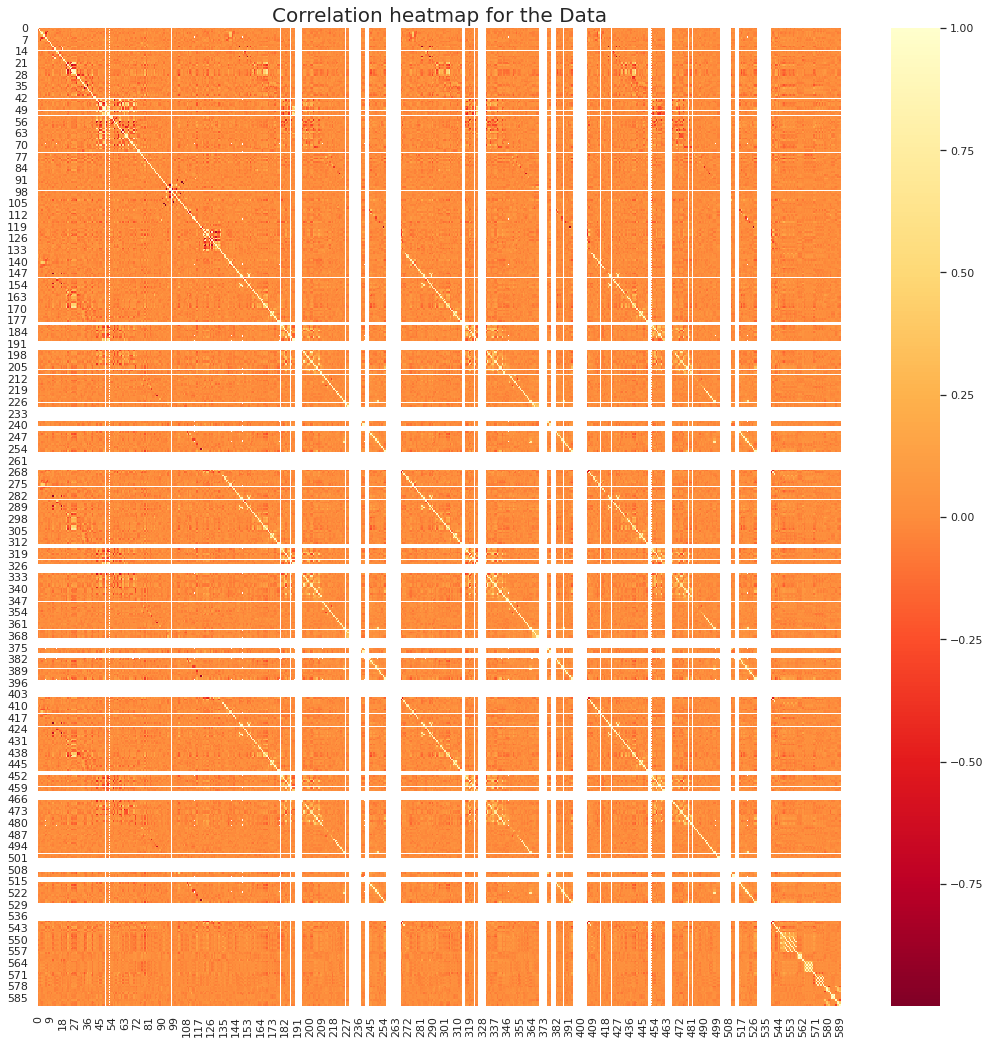

In [ ]:
# heatmap to get correlation

plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(df_feature.corr(), cmap = 'YlOrRd_r')
plt.title('Correlation heatmap for the Data', fontsize = 20)